# Instalasi Library

In [ ]:
!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs








## Installing the NodeSource Node.js 18.x repo...





## Populating apt-get cache...



+ apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease

Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]

Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]

Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]

Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]

Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease

Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease

Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [857 kB]

Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,082 kB]

Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,215 kB]

Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease



# Scraping Data tweet BPJS

In [ ]:
# Crawl Data

filename = 'bpjs_2022_des.csv'
query = "bpjs lang:id since:2022-12-01 until:2022-12-17"
limit = 10000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{query}" -l {limit} --token

# membuka file

In [1]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/scraping-bpjs/bpjs_2022.csv', sep=';')
df2 = pd.read_csv('/kaggle/input/scraping-bpjs/bpjs_2022_des (1).csv', sep=';')
df3 = pd.read_csv('/kaggle/input/scraping-bpjs/bpjs_2022_des (2).csv', sep=';')
df4 = pd.read_csv('/kaggle/input/scraping-bpjs/bpjs_2022_des (3).csv', sep=';')
df5 = pd.read_csv('/kaggle/input/scraping-bpjs/bpjs_2022_des.csv', sep=';')
df_total = pd.concat([df1,df2,df3,df4,df5],axis=0)
df_total

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Dec 30 23:59:02 +0000 2022,1608975982446411778,"majuuu km jaehyun motoran, ak punya bpjs",0,0,0,1,in,1460185681498542085,1608975982446411778,jfrypxch,https://twitter.com/jfrypxch/status/1608975982...
1,Fri Dec 30 23:57:27 +0000 2022,1608975586432802816,@Dumbpeopleisme bw fc bpjs sm ktp 2 lembar,0,1,0,0,in,1308422385511563264,1608885936666079232,redchizuu,https://twitter.com/redchizuu/status/160897558...
2,Fri Dec 30 23:57:13 +0000 2022,1608975524667469826,@prastow @torotrapah Konfirmasi ke dinas kepen...,0,0,0,0,in,1125331776,1608815061472272387,gandatk32065,https://twitter.com/gandatk32065/status/160897...
3,Fri Dec 30 23:51:12 +0000 2022,1608974012629266433,Akhir tahun WAG circle malah ngobrolin pemutus...,0,2,0,2,in,223602857,1608974012629266433,kakakamri,https://twitter.com/kakakamri/status/160897401...
4,Fri Dec 30 23:47:35 +0000 2022,1608973103975247873,"@TirtoID Dibikinin BPJS mrt aja sekalian, biar...",0,0,0,0,in,1011674022143148032,1608791640231272450,JunyAwaliyah,https://twitter.com/JunyAwaliyah/status/160897...
...,...,...,...,...,...,...,...,...,...,...,...,...
793,Fri Dec 23 10:08:20 +0000 2022,1606230215780315136,@dypmhrn Alhamdulillah aku sering pke BPJS dan...,0,1,0,0,in,1397179161282703361,1606134864218148864,dudodida,https://twitter.com/dudodida/status/1606230215...
794,Fri Dec 23 10:07:55 +0000 2022,1606230110272528386,Minggu minggu ini harus banyak2 sabar krn kudu...,0,0,0,0,in,142218977,1606230110272528386,AqAlie,https://twitter.com/AqAlie/status/160623011027...
795,Fri Dec 23 10:02:50 +0000 2022,1606228830883979266,BPJS Ketenagakerjaan terus melakukan peningkat...,0,0,0,0,in,22126902,1606228830883979266,republikaonline,https://twitter.com/republikaonline/status/160...
796,Fri Dec 23 10:00:37 +0000 2022,1606228275826929665,@iqbal_daryono Antri feri opo antri BPJS kui?,0,0,0,0,in,19077160,1606187983991738373,yoedidharma,https://twitter.com/yoedidharma/status/1606228...


# Import Library for labelling

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline
import emoji
import re
import html
import pandas as pd
pretrained_id = "mdhugol/indonesia-bert-sentiment-classification"
label_id = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Cleaning Data

In [5]:
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocess_tweet(tweet):
    tweet = tweet.lower() #Merubah format teks menjadi format huruf kecil semua (lowercase).
    # Remove @username
    tweet = re.sub(r'@[\w_]+', '', tweet)
    # Remove HTML tags
    tweet = re.sub(r'<.*?>', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove www URLs
    tweet = re.sub(r'www.\S+', '', tweet)

    #Menghapus karakter angka.
    tweet = re.sub('[^A-Za-z]+', ' ', str(tweet))
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = tweet.strip()

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = stemmer.stem(tweet)
    return tweet

In [6]:
df_total['cleaning'] = df_total['full_text'].apply(preprocess_tweet)
df_total.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,cleaning
0,Fri Dec 30 23:59:02 +0000 2022,1608975982446411778,"majuuu km jaehyun motoran, ak punya bpjs",0,0,0,1,in,1460185681498542085,1608975982446411778,jfrypxch,https://twitter.com/jfrypxch/status/1608975982...,majuuu km jaehyun motor ak punya bpjs
1,Fri Dec 30 23:57:27 +0000 2022,1608975586432802816,@Dumbpeopleisme bw fc bpjs sm ktp 2 lembar,0,1,0,0,in,1308422385511563264,1608885936666079232,redchizuu,https://twitter.com/redchizuu/status/160897558...,bw fc bpjs sm ktp lembar
2,Fri Dec 30 23:57:13 +0000 2022,1608975524667469826,@prastow @torotrapah Konfirmasi ke dinas kepen...,0,0,0,0,in,1125331776,1608815061472272387,gandatk32065,https://twitter.com/gandatk32065/status/160897...,konfirmasi ke dinas duduk sinkron wes pak seme...
3,Fri Dec 30 23:51:12 +0000 2022,1608974012629266433,Akhir tahun WAG circle malah ngobrolin pemutus...,0,2,0,2,in,223602857,1608974012629266433,kakakamri,https://twitter.com/kakakamri/status/160897401...,akhir tahun wag circle malah ngobrolin putus k...
4,Fri Dec 30 23:47:35 +0000 2022,1608973103975247873,"@TirtoID Dibikinin BPJS mrt aja sekalian, biar...",0,0,0,0,in,1011674022143148032,1608791640231272450,JunyAwaliyah,https://twitter.com/JunyAwaliyah/status/160897...,dibikinin bpjs mrt aja sekali biar yg miskin m...


In [7]:
df_total.to_csv('hasil_cleaning', index=False)

# Remove Stopwords

In [23]:
from nltk.corpus import stopwords

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian')) | set(['bpjs'])
def remove_short_words(tweet):
     # split the text into words
        words = tweet.split()
        # filter out words with less than 2 characters
        words = [word for word in words if len(word) > 3]
        tokens_without_stopword = [word for word in words if not word in list_stopwords]
        # join the remaining words into a string
        tweet = ' '.join(tokens_without_stopword)
        return tweet
df_fix = df_total.copy()
df_fix['Cleaned Comment'] = df_fix['cleaning'].apply(remove_short_words)
df_fix

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,cleaning,Cleaned Comment
0,Fri Dec 30 23:59:02 +0000 2022,1608975982446411778,"majuuu km jaehyun motoran, ak punya bpjs",0,0,0,1,in,1460185681498542085,1608975982446411778,jfrypxch,https://twitter.com/jfrypxch/status/1608975982...,majuuu km jaehyun motor ak punya bpjs,majuuu jaehyun motor
1,Fri Dec 30 23:57:27 +0000 2022,1608975586432802816,@Dumbpeopleisme bw fc bpjs sm ktp 2 lembar,0,1,0,0,in,1308422385511563264,1608885936666079232,redchizuu,https://twitter.com/redchizuu/status/160897558...,bw fc bpjs sm ktp lembar,lembar
2,Fri Dec 30 23:57:13 +0000 2022,1608975524667469826,@prastow @torotrapah Konfirmasi ke dinas kepen...,0,0,0,0,in,1125331776,1608815061472272387,gandatk32065,https://twitter.com/gandatk32065/status/160897...,konfirmasi ke dinas duduk sinkron wes pak seme...,konfirmasi dinas duduk sinkron nomor dipake sa...
3,Fri Dec 30 23:51:12 +0000 2022,1608974012629266433,Akhir tahun WAG circle malah ngobrolin pemutus...,0,2,0,2,in,223602857,1608974012629266433,kakakamri,https://twitter.com/kakakamri/status/160897401...,akhir tahun wag circle malah ngobrolin putus k...,circle ngobrolin putus kontrak tarik denger an...
4,Fri Dec 30 23:47:35 +0000 2022,1608973103975247873,"@TirtoID Dibikinin BPJS mrt aja sekalian, biar...",0,0,0,0,in,1011674022143148032,1608791640231272450,JunyAwaliyah,https://twitter.com/JunyAwaliyah/status/160897...,dibikinin bpjs mrt aja sekali biar yg miskin m...,dibikinin biar miskin miskin kaya pura pura mi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Fri Dec 23 10:08:20 +0000 2022,1606230215780315136,@dypmhrn Alhamdulillah aku sering pke BPJS dan...,0,1,0,0,in,1397179161282703361,1606134864218148864,dudodida,https://twitter.com/dudodida/status/1606230215...,alhamdulillah aku sering pke bpjs dan nakes ny...,alhamdulillah nakes ramah gantung faskes kali
794,Fri Dec 23 10:07:55 +0000 2022,1606230110272528386,Minggu minggu ini harus banyak2 sabar krn kudu...,0,0,0,0,in,142218977,1606230110272528386,AqAlie,https://twitter.com/AqAlie/status/160623011027...,minggu minggu ini harus banyak sabar krn kudu ...,minggu minggu sabar kudu riwa riwi kontrol pak...
795,Fri Dec 23 10:02:50 +0000 2022,1606228830883979266,BPJS Ketenagakerjaan terus melakukan peningkat...,0,0,0,0,in,22126902,1606228830883979266,republikaonline,https://twitter.com/republikaonline/status/160...,bpjs ketenagakerjaan terus laku tingkat cakup ...,ketenagakerjaan laku tingkat cakup semesta
796,Fri Dec 23 10:00:37 +0000 2022,1606228275826929665,@iqbal_daryono Antri feri opo antri BPJS kui?,0,0,0,0,in,19077160,1606187983991738373,yoedidharma,https://twitter.com/yoedidharma/status/1606228...,antri feri opo antri bpjs kui,antri feri antri


# prepare pretrain model for labeling tweet

In [9]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_id)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_id)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


# Labeling Tweet

In [24]:
bacaan = []
label = []
nilai = []
for i in range(0,len(df_fix['Cleaned Comment'])):
    #text = preprocess_tweet()
    text = df_fix['Cleaned Comment'].iloc[i]
    result = sentiment_analysis(text)
    status = label_id[result[0]['label']]
    score = result[0]['score']
    bacaan.append(text)
    label.append(status)
    nilai.append(score)
df_hasil = pd.DataFrame({'Text':bacaan,'status':label,'score':nilai})
df_hasil

,Text,status,score
0,majuuu jaehyun motor,positive,0.762398
1,lembar,neutral,0.926649
2,konfirmasi dinas duduk sinkron nomor dipake sa...,neutral,0.982721
3,circle ngobrolin putus kontrak tarik denger an...,neutral,0.918142
4,dibikinin biar miskin miskin kaya pura pura mi...,negative,0.996769
...,...,...,...
4027,alhamdulillah nakes ramah gantung faskes kali,positive,0.829723
4028,minggu minggu sabar kudu riwa riwi kontrol pak...,negative,0.979251
4029,ketenagakerjaan laku tingkat cakup semesta,neutral,0.674768
4030,antri feri antri,negative,0.871363


In [36]:
df_hasil['status'].value_counts()

negative    1663
neutral     1618
positive     751
Name: status, dtype: int64

/tmp/ipykernel_32/2407722141.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax2.pie(df_hasil.groupby(['status']).sum().reset_index()['score'].sort_values(ascending=False), explode=explode,


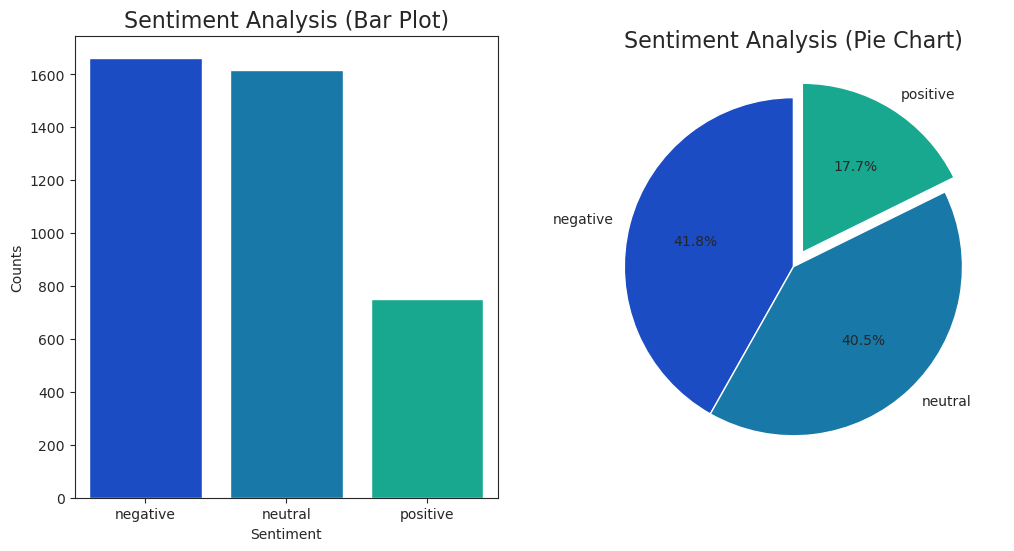

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')  # set background color to white
sns.set_palette('pastel')  # set palette color to 'pastel'

# membuat figure dan 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# menggambar bar plot di axes pertama
sns.countplot(x=df_hasil["status"],ax=ax1,palette='winter',order=df_hasil["status"].value_counts().index)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# menggambar pie chart di axes kedua

explode = (0, 0, 0.1)  # memberikan efek explode pada slice pertama
ax2.pie(df_hasil.groupby(['status']).sum().reset_index()['score'].sort_values(ascending=False), explode=explode, 
        labels=['negative','neutral','positive'], autopct='%1.1f%%',
        startangle=90,colors=['#1c4cc3','#1878a7','#18a88f'])
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)

# menampilkan figure
plt.show()

In [27]:
# I created the following data frame as a benchmark as ready-clean data 
clean_df = pd.DataFrame(df_hasil['Text'].tolist(), columns=['reviews'])
clean_df

,reviews
0,majuuu jaehyun motor
1,lembar
2,konfirmasi dinas duduk sinkron nomor dipake sa...
3,circle ngobrolin putus kontrak tarik denger an...
4,dibikinin biar miskin miskin kaya pura pura mi...
...,...
4027,alhamdulillah nakes ramah gantung faskes kali
4028,minggu minggu sabar kudu riwa riwi kontrol pak...
4029,ketenagakerjaan laku tingkat cakup semesta
4030,antri feri antri


In [28]:
remove_short_words = lambda s: ' '.join(filter(lambda w: len(w) > 3, s.split()))

# apply the function to the 'text' column of the DataFrame
clean_df['reviews'] = clean_df['reviews'].apply(remove_short_words)

# print the updated DataFrame
clean_df

,reviews
0,majuuu jaehyun motor
1,lembar
2,konfirmasi dinas duduk sinkron nomor dipake sa...
3,circle ngobrolin putus kontrak tarik denger an...
4,dibikinin biar miskin miskin kaya pura pura mi...
...,...
4027,alhamdulillah nakes ramah gantung faskes kali
4028,minggu minggu sabar kudu riwa riwi kontrol pak...
4029,ketenagakerjaan laku tingkat cakup semesta
4030,antri feri antri


# Word Analysis

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# initiate object to  CountVectorizer
vectorizer = CountVectorizer()

# transform data to vector
X = vectorizer.fit_transform(clean_df['reviews'])

# caunting how many the word appear then sorted descending order
word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top ten the word that appears the most in the review just for checking
print(sorted_word_counts[:10])

[('pake', 790), ('sehat', 588), ('kalo', 494), ('bayar', 460), ('sakit', 359), ('dokter', 273), ('udah', 271), ('obat', 267), ('ketenagakerjaan', 254), ('gigi', 248)]


In [30]:
#Save them on pandas data frame
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])
df_word_counts.head(10)

,Word,Frequency
0,pake,790
1,sehat,588
2,kalo,494
3,bayar,460
4,sakit,359
5,dokter,273
6,udah,271
7,obat,267
8,ketenagakerjaan,254
9,gigi,248


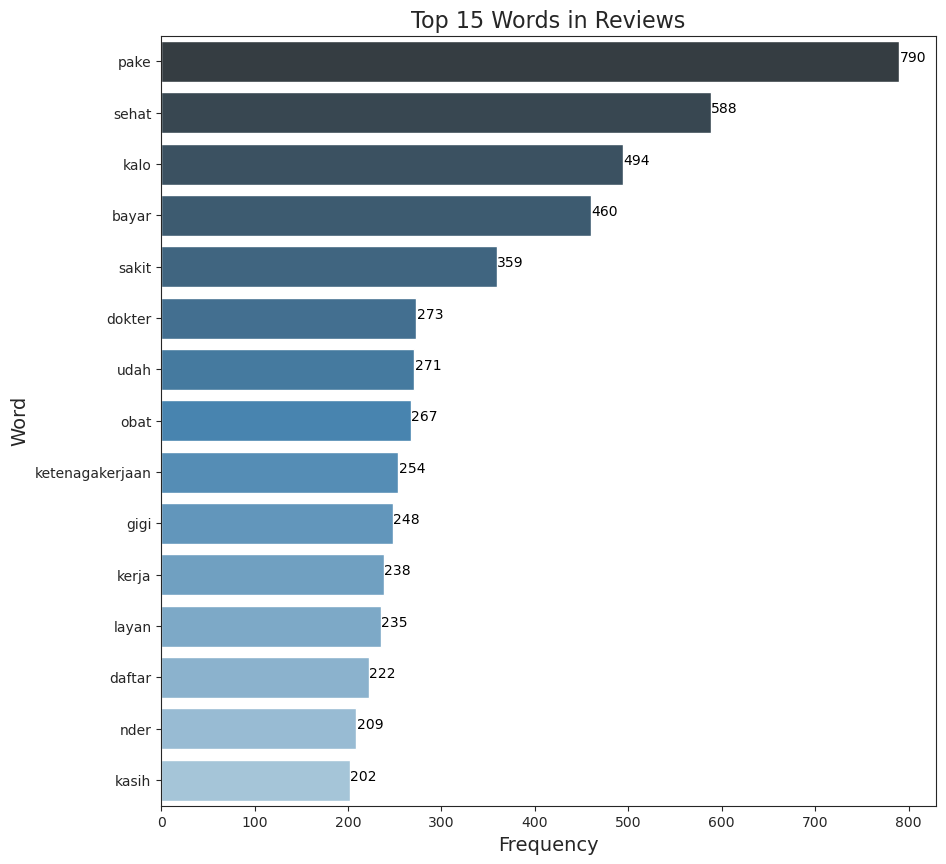

In [31]:
plt.figure(figsize=(10,10))
# setting how many rows or data will be visualized
top_words = df_word_counts.nlargest(15, 'Frequency')
sns.barplot(x='Frequency', y='Word', data=top_words, palette= sns.color_palette("Blues_d", n_colors=15)[::-1])
plt.ylabel('Word', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Words in Reviews', fontsize=16)
# Give anotation number for every bar
for i, v in enumerate(top_words['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 word.png')

# Bigrams Analysis

In [32]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing text
clean_df['clean_reviews'] = clean_df['reviews'].apply(lambda x: re.sub(r'[^\w\s]','',x.lower()))

# Tokenization
clean_df['tokens'] = clean_df['clean_reviews'].apply(lambda x: x.split())

# Bigram
clean_df['bigrams'] = clean_df['tokens'].apply(lambda x: [x[i] + " " + x[i+1] for i in range(len(x)-1)])

# Counting bigram frequency
bigram_freq = Counter([item for sublist in clean_df['bigrams'] for item in sublist])

# Creating DataFrame for top 15 bigrams
bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns=['Bigram', 'Frequency'])
bigrams_df.head(15)

,Bigram,Frequency
0,terima kasih,118
1,salam sahabat,108
2,rumah sakit,73
3,sahabat mohon,50
4,mohon maaf,50
5,aplikasi mobile,49
6,layan sehat,45
7,kantor cabang,38
8,obat pake,37
9,sehat terima,37


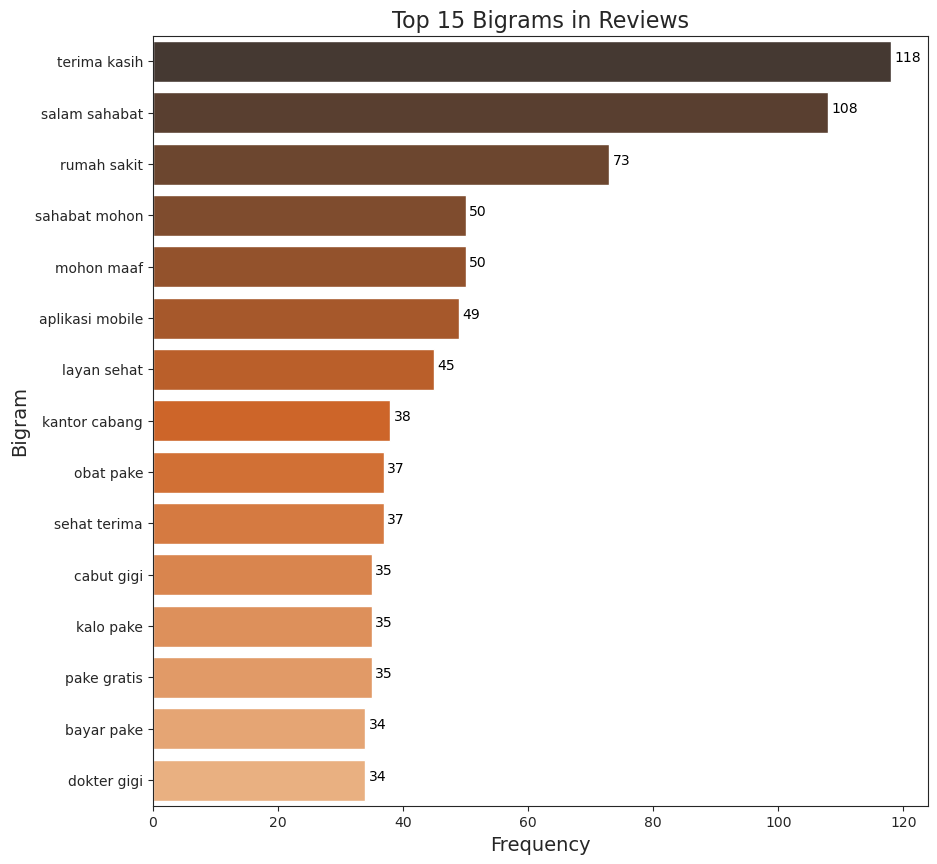

In [33]:
plt.figure(figsize=(10,10))
top_bigrams = bigrams_df.nlargest(15, 'Frequency')
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette= sns.color_palette("Oranges_d", n_colors=15)[::-1])
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Bigrams in Reviews', fontsize=16)
# Give anotation number for every bar
for i, v in enumerate(top_bigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 bigrams.png')

# Trigrams analysis

In [34]:
from collections import defaultdict
TrigramValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ")]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
#get the count of every word in both the columns of df_train and df_test dataframes
for text in df_hasil.Text:
  for word in generate_N_grams(text,3):
    TrigramValues3[word]+=1

Sentence after removing stopwords: ['majuuu', 'jaehyun', 'motor']
Sentence after removing stopwords: ['lembar']
Sentence after removing stopwords: ['konfirmasi', 'dinas', 'duduk', 'sinkron', 'nomor', 'dipake', 'salah', 'nomor', 'nomor', 'nomor', 'pake', 'nomor', 'konfirm']
Sentence after removing stopwords: ['circle', 'ngobrolin', 'putus', 'kontrak', 'tarik', 'denger', 'analisis', 'sudut', 'pandang']
Sentence after removing stopwords: ['dibikinin', 'biar', 'miskin', 'miskin', 'kaya', 'pura', 'pura', 'miskin', 'pura', 'miskin', 'panggil', 'miskin', 'trima', 'murah', 'bantu', 'negara', 'bilang', 'miskin']
Sentence after removing stopwords: ['brawijaya', 'hospital', 'saharjo', 'dukung', 'program', 'ketengakerjaan']
Sentence after removing stopwords: ['hore', 'milik', 'sehat', 'bansos', 'januari', 'daftar', 'terima', 'bpnt']
Sentence after removing stopwords: ['batas', 'daftar', 'ulang', 'lunas', 'universitas', 'negeri', 'jateng', 'anat', 'anak', 'bidikmisi', 'imposible', 'keluarga', 'extr

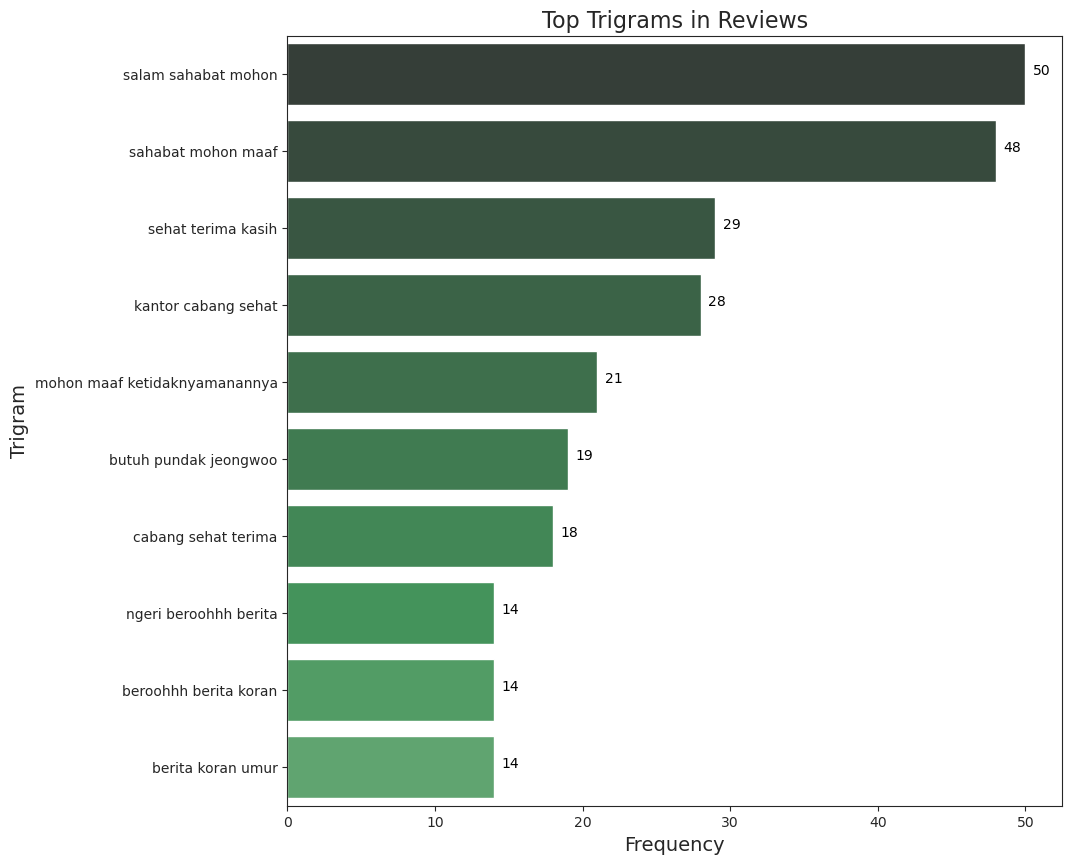

In [35]:
df_trigram3=pd.DataFrame(sorted(TrigramValues3.items(),key=lambda x:x[1],reverse=True))
df_trigram1=df_trigram3[0][:10]
df_trigram2=df_trigram3[1][:10]
df_trigram3.rename(columns={0:'Trigrams',1:'Frequency'},inplace=True)
top_trigrams = df_trigram3.nlargest(10, 'Frequency')
plt.figure(figsize=(10,10))
sns.barplot(x=df_trigram2, y=df_trigram1, data=df_trigram3, palette= sns.color_palette("Greens_d", n_colors=15)[::-1])
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top Trigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_trigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 trigrams.png', bbox_inches='tight')